In [13]:
import os
print(os.getcwd())

c:\Users\nash\Desktop\neural\cats-vs-dogs\train


In [11]:
if os.path.isdir('train') is False:
    os.mkdir('train')
    os.mkdir('train/cats')
    os.mkdir('train/dogs')
    os.mkdir('validation')
    os.mkdir('validation/cats')
    os.mkdir('validation/dogs')
    os.mkdir('test')
    os.mkdir('test/cats')
    os.mkdir('test/dogs')

In [17]:
import random
import shutil
import glob

print(os.getcwd())

for image in random.sample(glob.glob('cat*'), 1000):
    shutil.move(image, 'train/cats')

for image in random.sample(glob.glob('dog*'), 1000):
    shutil.move(image, 'train/dogs')

for image in random.sample(glob.glob('cat*'), 500):
    shutil.move(image, 'validation/cats')

for image in random.sample(glob.glob('dog*'), 500):
    shutil.move(image, 'validation/dogs')

for image in random.sample(glob.glob('cat*'), 100):
    shutil.move(image, 'test/cats')

for image in random.sample(glob.glob('dog*'), 100):
    shutil.move(image, 'test/dogs')



c:\Users\nash\Desktop\neural\cats-vs-dogs\train


In [22]:
train_path = os.path.join(os.getcwd(), 'train')
validation_path = os.path.join(os.getcwd(), 'validation')
test_path = os.path.join(os.getcwd(), 'test')

print(train_path)
print(validation_path)
print(test_path)

c:\Users\nash\Desktop\neural\cats-vs-dogs\train\train
c:\Users\nash\Desktop\neural\cats-vs-dogs\train\validation
c:\Users\nash\Desktop\neural\cats-vs-dogs\train\test


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224, 224), classes=['cats', 'dogs'], batch_size=10)

validation_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(
    directory=validation_path, target_size=(224, 224), classes=['cats', 'dogs'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224, 224), classes=['cats', 'dogs'], batch_size=10, shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [28]:
imgs, labels = next(train_batches)
labels

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [29]:
import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-118.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-116.779..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-100.779..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-116.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-117.68..151.061].
Clipping input dat

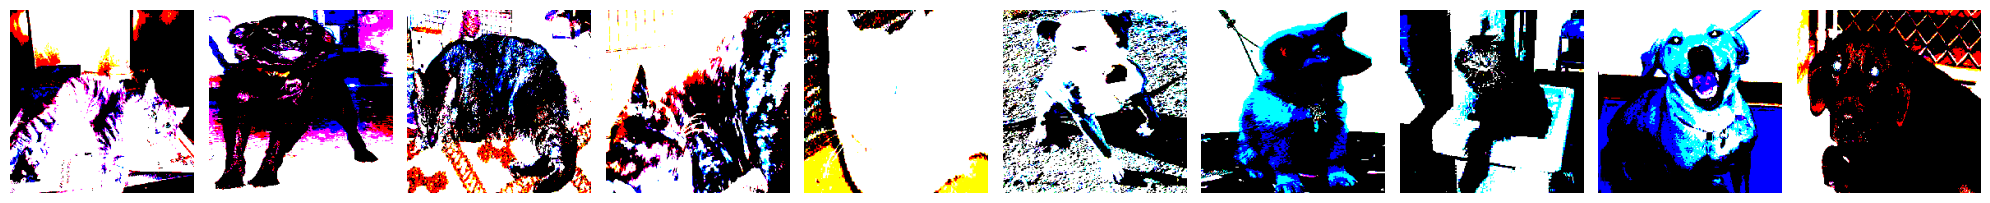

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [30]:
plotImages(imgs)
print(labels)